# Karnataka Agriculture Prediction

### Probelm Statement

Food is one of the basic needs of human beings. It depends on Agricultural Sector and its production. Also, Indian food industries are heavily dependent on agricultural yield production. But due to some poor climatically condition and poor yield production, lots of farmers have gone into suicide in the past. Reportedly, more than 59,000 farmers have attempted suicide over the last 30 years. Now a day’s all are talking about the agricultural field and their production, but no one has come forwarded to help them to increase their productivity. More and more researchers are doing research in the field of the agricultural sector. However, the only minimal effort has been made relevant to this. Most of the agricultural departments have lots of data pertaining to the crop yield in the past. Data in this field are huge and represented in the form of structured/unstructured form. Hence there is a need for an efficient technique to process these data and to discover potential information out to it. By analyzing these data one can discover potential crop by considering climate, season, ph level, soil type and many more. Thus, the proposed system will help the farmer in identifying correct crop to increase the production.  



### Packages/Concepts Used

        * Numpy                * Data Analysis
        * Pandas               * Data Visualisation
        * Matplotlib           * Splitting data
        * Seaborn              * Standardization
        * Sklearn              * Feature Selection
        * Squarify             * Chi-Squared Test
        * Warnings             * Machine Learning
                               * A/B Testing
                               * Hyper-parameter Tuning
                               * Confusion Matrix

#### Importing Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import squarify
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
#loading dataset with pandas
df=pd.read_excel('final dataset.xlsx')

In [3]:
df.head()

,year,season,crop,Period of sowing,period of harvesting,Soil Type,Ph-value,Nitrogen(%),Phosphorus(%),Pottasium(%),...,Max Temp in Sowing,Max Temp in Harvesting,Avg Temp in Sowing,Avg Temp in Harvesting,Avg Rainfall in Sowing,Avg Rainfall in Harvesting,area(hectare),production(Tonnes),yeild,Class labels
0,1998,Kharif,Jowar,May-July,September-December,black soil,6.0-7.5,47,45,45.0,...,36.7,30.1,31.6,25.1,1.3,9.7,12363,24855.0,2.010,yes
1,1998,Kharif,Cotton,May-July,December-April,black soil,7.0-8.0,7,14,11.0,...,22.0,-1.4,14.8,-7.7,92.3,29.2,15225,22129.0,1.453,no
2,1998,Kharif,Rice,May-September,October-January,red soil,5.0-8.0,35,35,34.4,...,32.6,18.5,26.3,12.0,80.6,77.2,197,316.0,1.604,no
3,1998,Rabi,Jowar,September-October,January-March,black soil,6.0-7.5,47,45,45.0,...,34.1,24.0,29.1,19.1,1.5,39.3,152540,120840.0,0.792,no
4,1998,Kharif,Cotton,May-July,December-April,black soil,7.0-8.0,7,14,11.0,...,22.0,-1.4,14.8,-7.7,92.3,29.2,11979,18434.0,1.538,no


In [4]:
df.columns

Index(['year', 'season', 'crop', 'Period of sowing', 'period of harvesting',
       'Soil Type', 'Ph-value', 'Nitrogen(%)', 'Phosphorus(%)', 'Pottasium(%)',
       'Water Consumption(mm)', 'Min Temp in Sowing', 'Min Temp in Harvesting',
       'Max Temp in Sowing', 'Max Temp in Harvesting', 'Avg Temp in Sowing',
       'Avg Temp in Harvesting', 'Avg Rainfall in Sowing',
       'Avg Rainfall in Harvesting', 'area(hectare)', 'production(Tonnes)',
       'yeild', 'Class labels'],
      dtype='object')

#### Data - Preprocessing

In [5]:
#getting rid of negative values as it needs to be termed in positive figures for model prediction
df["Min Temp in Harvesting"].value_counts()

 20.1    75
 5.6     75
 4.3     75
-13.9    55
 18.0    27
-10.5    20
 25.0    18
Name: Min Temp in Harvesting, dtype: int64

In [6]:
df['Min Temp in Harvesting']=df['Min Temp in Harvesting'].replace(
{
    -10.5 : 1
}
)

In [7]:
df['Min Temp in Harvesting']=df['Min Temp in Harvesting'].replace(
{
    -13.9 : 0
}
)

In [8]:
df['Avg Temp in Harvesting'].value_counts()

 19.1    75
 25.1    75
 12.0    75
-7.7     55
 24.1    27
-40.6    20
 30.2    18
Name: Avg Temp in Harvesting, dtype: int64

In [9]:
#df[df['Avg Temp in Harvesting']<-35]=0
#df[df['Avg Temp in Harvesting']<0]=1
df['Avg Temp in Harvesting']=df['Avg Temp in Harvesting'].replace(
{
    -7.7 : 1
}
)

In [10]:
df['Avg Temp in Harvesting']=df['Avg Temp in Harvesting'].replace(
{
    -40.6 : 0
}
)

In [11]:
df['Avg Temp in Harvesting'].dtype

dtype('float64')

In [12]:
df['Avg Temp in Sowing'].value_counts()

29.1    75
31.6    75
26.3    75
14.8    55
10.1    27
14.5    20
19.1    18
Name: Avg Temp in Sowing, dtype: int64

In [13]:
df['Max Temp in Harvesting'].value_counts()

 30.1    95
 18.5    79
-1.4     55
 24.0    55
 26.8    23
 2.4     20
 35.4    18
Name: Max Temp in Harvesting, dtype: int64

In [14]:
df['Max Temp in Harvesting']=df['Avg Temp in Harvesting'].replace(
{
    -1.4 : 1
}
)

In [15]:
df['Avg Temp in Harvesting'].shape

(345,)

In [16]:
df['Water Consumption(mm)'].head()

0    350-650
1    550-950
2    300-950
3    350-650
4    550-950
Name: Water Consumption(mm), dtype: object

In [17]:
#Water Consumption is the only feature which can't be viewed in the head function
df['Water Consumption(mm)'].value_counts()

350-650    168
300-950    102
550-950     75
Name: Water Consumption(mm), dtype: int64

In [18]:
df['Water Consumption(mm)'].shape

(345,)

In [19]:
df.shape

(345, 23)

In [20]:
#checking for null values
df.isnull().any()

year                          False
season                        False
crop                          False
Period of sowing              False
period of harvesting          False
Soil Type                     False
Ph-value                      False
Nitrogen(%)                   False
Phosphorus(%)                 False
Pottasium(%)                  False
Water Consumption(mm)         False
Min Temp in Sowing            False
Min Temp in Harvesting        False
Max Temp in Sowing            False
Max Temp in Harvesting        False
Avg Temp in Sowing            False
Avg Temp in Harvesting        False
Avg Rainfall in Sowing        False
Avg Rainfall in Harvesting    False
area(hectare)                 False
production(Tonnes)            False
yeild                         False
Class labels                  False
dtype: bool

In [21]:
df.dtypes

year                            int64
season                         object
crop                           object
Period of sowing               object
period of harvesting           object
Soil Type                      object
Ph-value                       object
Nitrogen(%)                     int64
Phosphorus(%)                   int64
Pottasium(%)                  float64
Water Consumption(mm)          object
Min Temp in Sowing            float64
Min Temp in Harvesting        float64
Max Temp in Sowing            float64
Max Temp in Harvesting        float64
Avg Temp in Sowing            float64
Avg Temp in Harvesting        float64
Avg Rainfall in Sowing        float64
Avg Rainfall in Harvesting    float64
area(hectare)                   int64
production(Tonnes)            float64
yeild                         float64
Class labels                   object
dtype: object

In [22]:
df['season'].value_counts()

Kharif    205
Rabi       95
Summer     45
Name: season, dtype: int64

In [23]:
df['crop'].value_counts()

Jowar     168
Rice      102
Cotton     75
Name: crop, dtype: int64

#### Exploratory Data Analysis :

[]

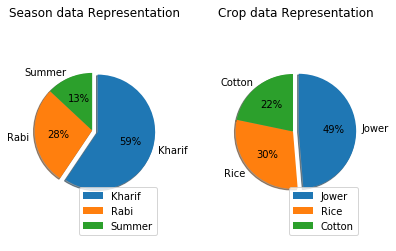

In [24]:
#plotting two plots
plt.subplot(1,2,1)
plt.pie(df['season'].value_counts(),explode=(0.1,0,0),counterclock=False,labels=['Kharif','Rabi','Summer'],autopct='%.0f%%',startangle=90,shadow=True)
plt.title('Season data Representation')
plt.legend(loc=4)
plt.axis('equal')

plt.subplot(1,2,2)
plt.pie(df['crop'].value_counts(),explode=(0.1,0,0),counterclock=False,labels=['Jower','Rice','Cotton'],autopct='%.0f%%',startangle=90,shadow=True)
plt.title('Crop data Representation')
plt.legend(loc=4)
plt.axis('equal')

plt.subplots_adjust(wspace=0.5)
plt.plot()




#### Observation :

1 . In Season data,Kharif season has the most cultivated crops

2 . In crops jower has a much leading numbers in crops.

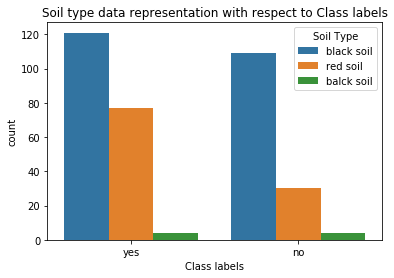

In [25]:
sns.countplot(data=df,x='Class labels',hue='Soil Type')
plt.title("Soil type data representation with respect to Class labels")
plt.show()

#### Observation :

1 . Typically in both Class labels we could see Black soil being more in numbers and followed by red soil and balck soil.

2 . It is hard to get information in this data.

[]

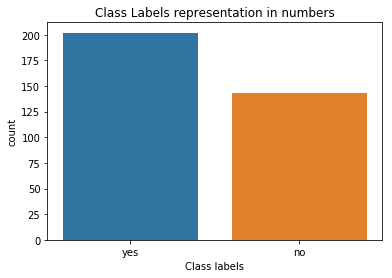

In [26]:
sns.countplot('Class labels',data=df)
plt.title('Class Labels representation in numbers')
plt.plot()

#### Observation :

1 . The data is not perfectly balanced but is slightly imbalanced with "YES" being more than the "NO".

In [27]:
df["Period of sowing"].value_counts()

May-July             200
September-October     75
January-March         45
August-September      20
May-September          5
Name: Period of sowing, dtype: int64

In [28]:
df['period of harvesting'].value_counts()

December-April        125
January-March          75
September-December     75
April-July             45
February-April         20
October-January         5
Name: period of harvesting, dtype: int64

[]

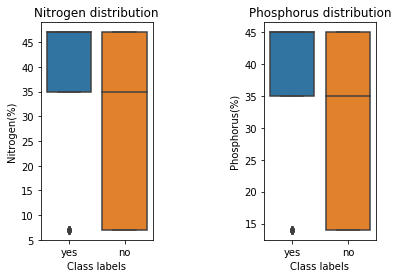

In [29]:
#boxplot for Nitrogen and Phosphorus
plt.subplot(1,2,1)
sns.boxplot(x='Class labels',y='Nitrogen(%)',data=df)
plt.title("Nitrogen distribution")

plt.subplot(1,2,2)
sns.boxplot(x="Class labels",y="Phosphorus(%)",data=df)
plt.title("Phosphorus distribution")

plt.subplots_adjust(wspace=1)
plt.plot()

#### Observation :

1 . Both Nitrogen and Phosphorus data are ranging from 35-45 with minute outliers near 15 w.r.t "YES".

2 . With terms of "NO", both have a Median of 35 with starting range of 10 and ending range of 45.

In [30]:
df['Avg Temp in Harvesting'].value_counts()

19.1    75
25.1    75
12.0    75
1.0     55
24.1    27
0.0     20
30.2    18
Name: Avg Temp in Harvesting, dtype: int64

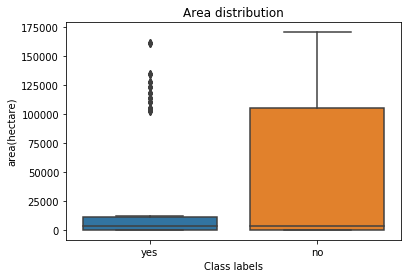

In [31]:
#boxplot for Area
sns.boxplot(x='Class labels',y='area(hectare)',data=df)
plt.title("Area distribution")
plt.show()

#### Observation :

1 . There are some outliers in"YES" label ranging from 100000 to 175000,with a median of near to 0.

2 . With median close to 0,It has range of 0-100000 w.r.t "NO" label.

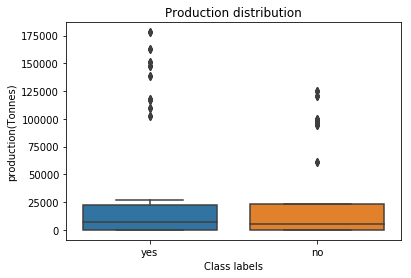

In [32]:
sns.boxplot(x='Class labels',y='production(Tonnes)',data=df)
plt.title("Production distribution")
plt.show()

#### Observation :

1 . Both good and bad crop have median value of near to 0 and ranges from 0-25000.

[]

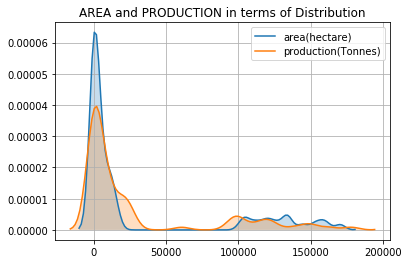

In [33]:
sns.kdeplot(df['area(hectare)'],shade=True)
sns.kdeplot(df['production(Tonnes)'],shade=True)
plt.grid()
plt.title("AREA and PRODUCTION in terms of Distribution")
plt.plot()

#### Observation :

1 . Area data is right skewed with mean of 0.

2 . Production data is also right skewed but with 40% of data in mean 0. 

In [34]:
df['Period of sowing'].value_counts()

May-July             200
September-October     75
January-March         45
August-September      20
May-September          5
Name: Period of sowing, dtype: int64

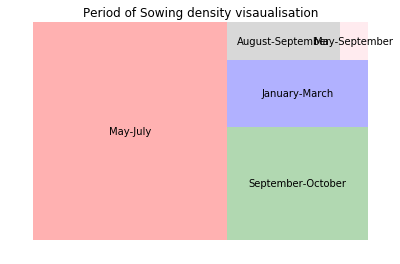

In [35]:
squarify.plot(sizes=df['Period of sowing'].value_counts(),label=["May-July","September-October","January-March","August-September","May-September"],color=["red","green","blue","grey","pink"],alpha=.3)
plt.title("Period of Sowing density visaualisation")
plt.axis('off')
plt.show()

#### Observation :

1 . Most of the sowing is in month for May-July.

[]

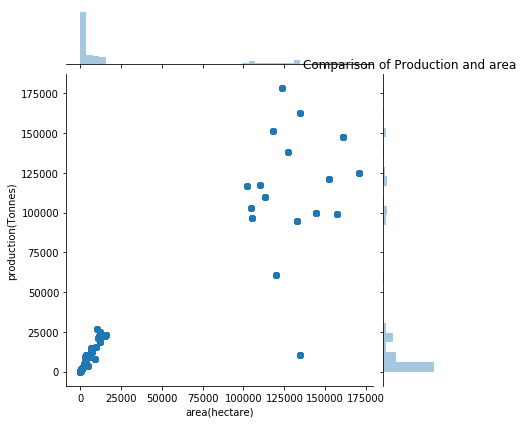

In [36]:
sns.jointplot(x="area(hectare)",y="production(Tonnes)",data=df)
plt.title("Comparison of Production and area")
plt.plot()

#### Observation :

1 . Right skewed distribution with 0-25000 in  both area and production.

In [37]:
df['Ph-value'].value_counts()

6.0-7.5    168
5.0-8.0    102
7.0-8.0     75
Name: Ph-value, dtype: int64

[]

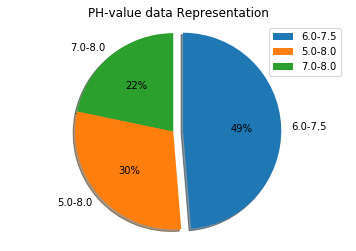

In [38]:
plt.pie(df['Ph-value'].value_counts(),explode=(0.1,0,0),counterclock=False,labels=['6.0-7.5','5.0-8.0','7.0-8.0'],autopct='%.0f%%',startangle=90,shadow=True)
plt.title('PH-value data Representation')
plt.legend(loc=1)
plt.axis('equal')
plt.plot()

#### Observation :

1 . 6.0-7.5 is the most cultivated ph value crop.

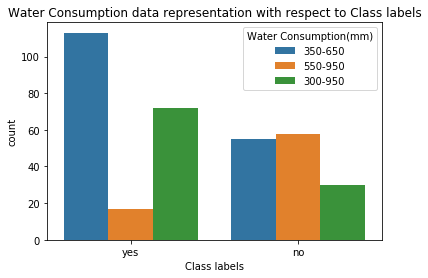

In [39]:
sns.countplot(data=df,x='Class labels',hue='Water Consumption(mm)')
plt.title("Water Consumption data representation with respect to Class labels")
plt.show()

#### Observation :

1 .  Water consumption with 350-650 mm has a high chances of being "yes" labelled.

2 . If 550-950 mm then,high chances of being bad crop.

#### Confusion Matrix Visualisation

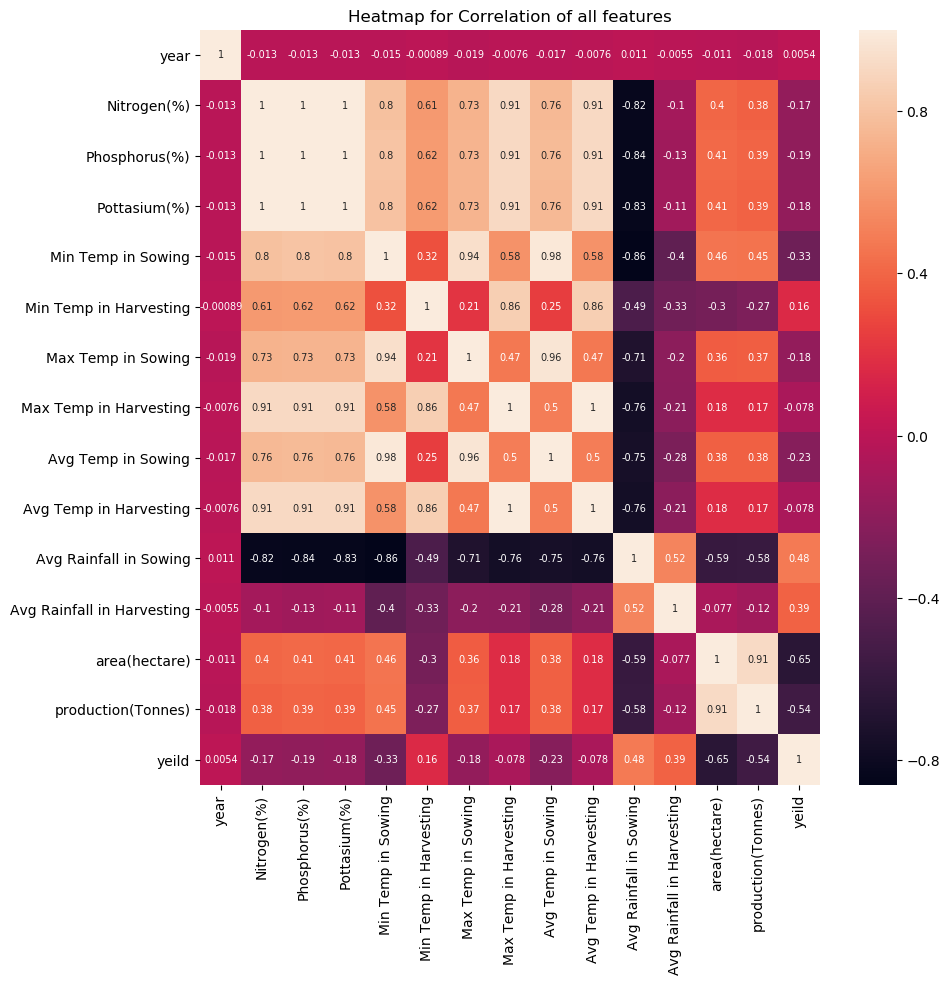

In [40]:
#Confusion matrix plotting
plt.figure(figsize=(10,10),dpi=100)
sns.heatmap(df.corr(),annot=True,annot_kws={"size": 7})
plt.title("Heatmap for Correlation of all features")
plt.show()

#### Observation :

1 . we have more highly negative correlated features and is hard to find the required features. 

In [41]:
df.dtypes

year                            int64
season                         object
crop                           object
Period of sowing               object
period of harvesting           object
Soil Type                      object
Ph-value                       object
Nitrogen(%)                     int64
Phosphorus(%)                   int64
Pottasium(%)                  float64
Water Consumption(mm)          object
Min Temp in Sowing            float64
Min Temp in Harvesting        float64
Max Temp in Sowing            float64
Max Temp in Harvesting        float64
Avg Temp in Sowing            float64
Avg Temp in Harvesting        float64
Avg Rainfall in Sowing        float64
Avg Rainfall in Harvesting    float64
area(hectare)                   int64
production(Tonnes)            float64
yeild                         float64
Class labels                   object
dtype: object

In [42]:
#label encoding for categorical features for FEature Selection
lb=LabelEncoder()

In [43]:
x=df.iloc[:,0:22].values
y=df.iloc[:,22].values

In [44]:
x[:,1]=lb.fit_transform(x[:,1])
x[:,2]=lb.fit_transform(x[:,2])
x[:,3]=lb.fit_transform(x[:,3])
x[:,4]=lb.fit_transform(x[:,4])
x[:,5]=lb.fit_transform(x[:,5])
x[:,6]=lb.fit_transform(x[:,6])
x[:,10]=lb.fit_transform(x[:,10])


In [45]:
y=lb.fit_transform(y)

In [46]:
df

,year,season,crop,Period of sowing,period of harvesting,Soil Type,Ph-value,Nitrogen(%),Phosphorus(%),Pottasium(%),...,Max Temp in Sowing,Max Temp in Harvesting,Avg Temp in Sowing,Avg Temp in Harvesting,Avg Rainfall in Sowing,Avg Rainfall in Harvesting,area(hectare),production(Tonnes),yeild,Class labels
0,1998,Kharif,Jowar,May-July,September-December,black soil,6.0-7.5,47,45,45.0,...,36.7,25.1,31.6,25.1,1.3,9.7,12363,24855.00,2.010,yes
1,1998,Kharif,Cotton,May-July,December-April,black soil,7.0-8.0,7,14,11.0,...,22.0,1.0,14.8,1.0,92.3,29.2,15225,22129.00,1.453,no
2,1998,Kharif,Rice,May-September,October-January,red soil,5.0-8.0,35,35,34.4,...,32.6,12.0,26.3,12.0,80.6,77.2,197,316.00,1.604,no
3,1998,Rabi,Jowar,September-October,January-March,black soil,6.0-7.5,47,45,45.0,...,34.1,19.1,29.1,19.1,1.5,39.3,152540,120840.00,0.792,no
4,1998,Kharif,Cotton,May-July,December-April,black soil,7.0-8.0,7,14,11.0,...,22.0,1.0,14.8,1.0,92.3,29.2,11979,18434.00,1.538,no
5,1998,Kharif,Jowar,May-July,September-December,black soil,6.0-7.5,47,45,45.0,...,36.7,25.1,31.6,25.1,1.3,9.7,11598,21354.00,1.841,yes
6,1998,Kharif,Rice,May-July,December-April,red soil,5.0-8.0,35,35,34.4,...,32.6,12.0,26.3,12.0,80.6,77.2,128,202.00,1.570,no
7,1998,Rabi,Jowar,September-October,January-March,black soil,6.0-7.5,47,45,45.0,...,34.1,19.1,29.1,19.1,1.5,39.3,160974,147679.00,0.917,yes
8,1998,Kharif,Cotton,May-July,December-April,black soil,7.0-8.0,7,14,11.0,...,22.0,1.0,14.8,1.0,92.3,29.2,15767,23002.00,1.458,no
9,1998,Kharif,Jowar,May-July,September-December,black soil,6.0-7.5,47,45,45.0,...,36.7,25.1,31.6,25.1,1.3,9.7,11375,22359.00,1.965,yes


In [47]:
df2=pd.DataFrame(y,columns=['labels'])


In [48]:
df1=pd.DataFrame(x,columns=['year', 'season', 'crop', 'Period of sowing', 'period of harvesting',
       'Soil Type', 'Ph-value', 'Nitrogen(%)', 'Phosphorus(%)', 'Pottasium(%)',
       'Water Consumption(mm)', 'Min Temp in Sowing', 'Min Temp in Harvesting',
       'Max Temp in Sowing', 'Max Temp in Harvesting', 'Avg Temp in Sowing',
       'Avg Temp in Harvesting', 'Avg Rainfall in Sowing',
       'Avg Rainfall in Harvesting', 'area(hectare)', 'production(Tonnes)',
       'yeild'])

In [49]:
#df1.drop(['Avg Temp in Harvesting'],axis=1,inplace=True)

#### Feature Selection : 

In [51]:
#SelectKbest algorithm chi-squared test for Feature Selection :
bf=SelectKBest(score_func=chi2,k=10)
fit=bf.fit(df1,df2)

In [52]:
dfscore=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(df1.columns)

In [53]:
featscore=pd.concat([dfcolumns,dfscore],axis=1)
featscore.columns=["specs","score"]

In [54]:
df.dtypes

year                            int64
season                         object
crop                           object
Period of sowing               object
period of harvesting           object
Soil Type                      object
Ph-value                       object
Nitrogen(%)                     int64
Phosphorus(%)                   int64
Pottasium(%)                  float64
Water Consumption(mm)          object
Min Temp in Sowing            float64
Min Temp in Harvesting        float64
Max Temp in Sowing            float64
Max Temp in Harvesting        float64
Avg Temp in Sowing            float64
Avg Temp in Harvesting        float64
Avg Rainfall in Sowing        float64
Avg Rainfall in Harvesting    float64
area(hectare)                   int64
production(Tonnes)            float64
yeild                         float64
Class labels                   object
dtype: object

In [55]:
print(featscore.nlargest(25,'score'))

                         specs          score
19               area(hectare)  608233.646258
20          production(Tonnes)   19341.225697
17      Avg Rainfall in Sowing     617.509511
7                  Nitrogen(%)     296.686323
12      Min Temp in Harvesting     285.925111
16      Avg Temp in Harvesting     222.759240
14      Max Temp in Harvesting     222.759240
9                 Pottasium(%)     213.428334
8                Phosphorus(%)     171.269426
11          Min Temp in Sowing     114.420721
15          Avg Temp in Sowing      82.616832
13          Max Temp in Sowing      66.499916
21                       yeild      36.292679
4         period of harvesting      20.423373
10       Water Consumption(mm)      19.902292
6                     Ph-value      19.902292
2                         crop      17.013250
1                       season       5.226739
18  Avg Rainfall in Harvesting       2.540287
5                    Soil Type       2.097791
3             Period of sowing    

In [56]:
#dropping features with less scores affecting the target feature.
df1.drop(['year','Period of sowing','Avg Rainfall in Harvesting','season','crop','Ph-value','Water Consumption(mm)','period of harvesting','yeild','Max Temp in Sowing','Min Temp in Sowing'],axis=1,inplace=True)

In [57]:
df1.shape

(345, 11)

In [58]:
df=pd.concat([df1,df2],axis=1)

In [59]:
df.head()

,Soil Type,Nitrogen(%),Phosphorus(%),Pottasium(%),Min Temp in Harvesting,Max Temp in Harvesting,Avg Temp in Sowing,Avg Temp in Harvesting,Avg Rainfall in Sowing,area(hectare),production(Tonnes),labels
0,1,47,45,45,20.1,25.1,31.6,25.1,1.3,12363,24855,1
1,1,7,14,11,0,1,14.8,1,92.3,15225,22129,0
2,2,35,35,34.4,5.6,12,26.3,12,80.6,197,316,0
3,1,47,45,45,4.3,19.1,29.1,19.1,1.5,152540,120840,0
4,1,7,14,11,0,1,14.8,1,92.3,11979,18434,0


In [60]:
x=df.iloc[:,0:11].values
y=df.iloc[:,11].values

In [61]:
#Splitting data with Train_test_split method
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [63]:
print("TRAINING DATA")
print("X_train Shape : ",x_train.shape)
print("Y_train Shape : ",y_train.shape)
print("*"*50)
print("*"*50)
print("TESTING DATA")
print("X_test Shape : ",x_test.shape)
print("Y_test Shape : ",y_test.shape)

TRAINING DATA
X_train Shape :  (276, 11)
Y_train Shape :  (276,)
**************************************************
**************************************************
TESTING DATA
X_test Shape :  (69, 11)
Y_test Shape :  (69,)


In [115]:
#Standardization for features
sc=StandardScaler()

In [116]:
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

#### Model Building :

##### A/B testing :

In [117]:
#Logsitic regression implementation
lr=LogisticRegression()

In [118]:
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [119]:
y_pred_logistic=lr.predict(x_test)

In [120]:
accuracy_score(y_pred_logistic,y_test)

0.8115942028985508

In [121]:
#Support vector machine Implementation
svm1=SVC()

In [122]:
svm1.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [123]:
y_pred_svm=svm1.predict(x_test)

In [124]:
acc_svm=accuracy_score(y_pred_svm,y_test)
print("Accuracy Score:",acc_svm*100,"%")

Accuracy Score: 75.36231884057972 %


### Observation :

Logistic regression is performimg well than support vector machine.

So we will move further with Logistic regression.

In [125]:
#cross validation
folds=10
skf=StratifiedKFold(n_splits=folds,shuffle=True,random_state=0)

In [126]:
skf

StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

#### Hyper-parameter Tuning

In [133]:
#hyper-parameter tuning with gridsearch-cv
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,0.01,.09,1,25],'class_weight':['balanced'],'max_iter':[100,200]}
grid_clf_acc = GridSearchCV(lr, param_grid = grid_values,scoring = 'accuracy',cv=skf)
grid_clf_acc.fit(x_train, y_train)

print(grid_clf_acc.best_estimator_)

y_pred_acc = grid_clf_acc.predict(x_test)

LogisticRegression(C=25, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


In [134]:
lr_optimised=LogisticRegression(C=25, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [135]:
lr_optimised.fit(x_train,y_train)

LogisticRegression(C=25, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [136]:
y_pred_logistic_optimised=lr.predict(x_test)

In [148]:
print("Accuracy score : ",accuracy_score(y_pred_logistic,y_test)*100,"%")

Accuracy score :  81.15942028985508 %


In [138]:
#confusion matrix for optimised model
Cn=confusion_matrix(y_test,y_pred_logistic_optimised)

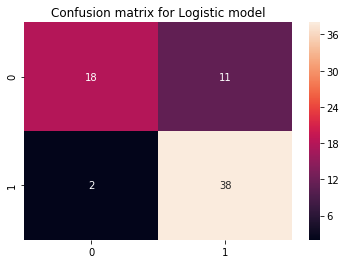

In [143]:
sns.heatmap(Cn,annot=True)
plt.title("Confusion matrix for Logistic model")
plt.show()

### Observation :

1 . After Hyper-parameter tuning,we get an accuracy of 81.15% and is the final model for agriculture dataset.

--------------------------------------end----------------------------------------------